This notebook is part of the `kikuchipy` documentation https://kikuchipy.org.
Links to the documentation won't work from the notebook.

# Change scan and pattern size

Patterns in an [EBSD](reference.rst#kikuchipy.signals.EBSD) or
[EBSDMasterPattern](reference.rst#kikuchipy.signals.EBSDMasterPattern) signal
`s` are stored in the `s.data` attribute as either [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) or
[dask.array.Array](https://docs.dask.org/en/latest/array.html).
[HyperSpy's user guide](http://hyperspy.org/hyperspy-doc/current/user_guide/signal.html#indexing)
explains how to access, i.e. index, the data. This section details example uses
of scan (navigation) and pattern (signal) indexing specific to EBSD and
EBSDMasterPattern signals.

Let's import the necessary libraries, a larger Nickel EBSD test data set from
the [kikuchipy.data](reference.rst#kikuchipy.data.nickel_ebsd_large) module
<cite data-cite="anes2019electron">Ånes et al. (2019)</cite>, and the Nickel
master pattern, also from the data module:

In [24]:
# exchange inline for qt5 for interactive plotting from the pyqt package
%matplotlib inline

import hyperspy.api as hs
import kikuchipy as kp
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 15


# Use kp.load("data.h5") to load your own data
s = kp.data.nickel_ebsd_large(allow_download=True)  # External download
print(s)

s_mp = kp.data.nickel_ebsd_master_pattern_small(hemisphere="both")
print(s_mp, s_mp.projection)

<EBSD, title: patterns Scan 1, dimensions: (75, 55|60, 60)>
<EBSDMasterPattern, title: ni_mc_mp_20kv_uint8_gzip_opts9, dimensions: (2|401, 401)> spherical


## Crop a scan or pattern

A new `EBSD` or `EBSDMasterPattern` signal `s2` can be created from a region of
interest (ROI) in another EBSD or EBSDMasterPattern signal `s` by using
HyperSpy's navigation indexing method ``inav``. The new signal keeps the
`metadata` and `original_metadata` of `s`. Say we, after (lazily) plotting and
inspecting the EBSD scan, want to create a new, smaller scan of the patterns
within a rectangle defined by the upper left pattern with index (5, 7)
(column, row) and the bottom right pattern with index (17, 23):

In [5]:
s2 = s.inav[5:17, 7:23]
s2

<EBSD, title: patterns Scan 1, dimensions: (12, 16|60, 60)>

Or, we want only the northern hemisphere of the `EBSDMasterPattern`:

In [11]:
s_mp2 = s_mp.inav[0]
s_mp2

<EBSDMasterPattern, title: ni_mc_mp_20kv_uint8_gzip_opts9, dimensions: (|401, 401)>

Patterns can also be cropped with the signal indexing method `isig`. Say we
wanted to remove the ten outermost pixels in our (60, 60) pixel Nickel patterns:

In [12]:
s3 = s.isig[10:50, 10:50]
s3

<EBSD, title: patterns Scan 1, dimensions: (75, 55|40, 40)>

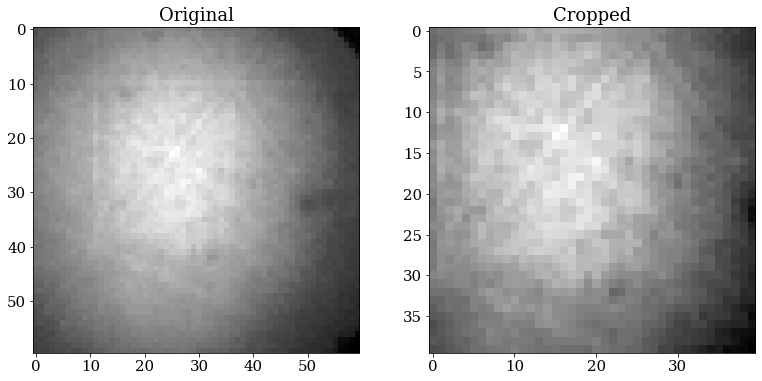

In [25]:
_, ax = plt.subplots(figsize=(13, 6), ncols=2)
ax[0].imshow(s.inav[10, 50].data, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(s3.inav[10, 50].data, cmap="gray")
_ = ax[1].set_title("Cropped")

## Binning

A new `EBSD` signal with patterns binned e.g. by 2 can be obtained using the
[rebin()](reference.rst#kikuchipy.signals.EBSD.rebin) method provided by
HyperSpy, explained further in
[their user guide](http://hyperspy.org/hyperspy-doc/current/user_guide/signal.html#rebinning),
by passing in either the `scale` or `new_shape` parameter:

In [15]:
print(s, s.data.dtype)

<EBSD, title: patterns Scan 1, dimensions: (75, 55|60, 60)> uint8


In [16]:
s4 = s.rebin(scale=(1, 1, 2, 2))
print(s4, s4.data.dtype)

<EBSD, title: patterns Scan 1, dimensions: (75, 55|30, 30)> uint64


In [17]:
s5 = s.rebin(new_shape=(75, 55, 30, 30))
print(s5, s5.data.dtype)

<EBSD, title: patterns Scan 1, dimensions: (75, 55|30, 30)> uint64


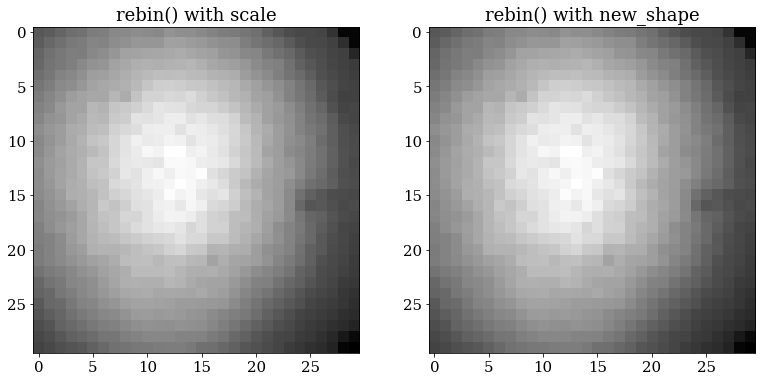

In [26]:
_, ax = plt.subplots(figsize=(13, 6), ncols=2)
ax[0].imshow(s4.inav[10, 50].data, cmap="gray")
ax[0].set_title("rebin() with scale")
ax[1].imshow(s5.inav[10, 50].data, cmap="gray")
_ = ax[1].set_title("rebin() with new_shape")

Note that `rebin()` casts the data to `uint64`. This means that in this example,
each pixel in the binned signals `s4` and `s5` takes up eight times the memory
of pixels in the original signal `s` (`uint8`). To revert to `uint8` data type,
we must rescale the intensities with
[rescale_intensity()](reference.rst#kikuchipy.signals.EBSD.rescale_intensity).

This also works for `EBSDMasterPattern` signals.